# Le Projiht

### Intrnat

In [1]:
from pynq.lib import Wifi

port = Wifi()
port.reset()
# CityUHK_EE_GEF
# CityUHKEEWIFI
ssid = input("Type in the SSID:")
pwd = input("Type in the password:")
port.connect(ssid, pwd)
print("Ensure connection")

wpa_supplicant: no process found


Type in the SSID:CityUHK_EE_GEF
Type in the password:CityUHKEEWIFI
Ensure connection


In [10]:
!ping -c 3 google.com

PING google.com (142.250.198.46) 56(84) bytes of data.
64 bytes from nchkga-ap-in-f14.1e100.net (142.250.198.46): icmp_seq=1 ttl=113 time=13.4 ms
64 bytes from nchkga-ap-in-f14.1e100.net (142.250.198.46): icmp_seq=2 ttl=113 time=8.60 ms
64 bytes from nchkga-ap-in-f14.1e100.net (142.250.198.46): icmp_seq=3 ttl=113 time=16.7 ms

--- google.com ping statistics ---
3 packets transmitted, 3 received, 0% packet loss, time 2002ms
rtt min/avg/max/mdev = 8.604/12.914/16.732/3.336 ms


### Libs

In [37]:
#!pip install --force-reinstall mediapipe
#!rm face_landmarker_v2_with_blendshapes.task
#!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

!pip install ultralytics
!pip3 install ultralytics


print("OK cool")

OK cool


In [7]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

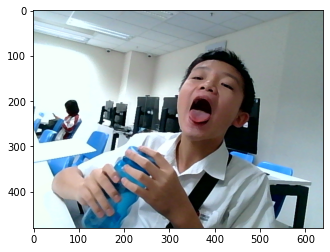

In [19]:
import matplotlib.pyplot as plt
import cv2

c = cv2.VideoCapture(0)
if not c.isOpened():
    print("Error: Could not access the webcam.")
ret, frame = c.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
img = frame

In [21]:
import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
FaceLandmarker = mp.tasks.vision.FaceLandmarker
FaceLandmarkerOptions = mp.tasks.vision.FaceLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = FaceLandmarkerOptions(
    base_options=BaseOptions(model_asset_path="face_landmarker_v2_with_blendshapes.task"),
    running_mode=VisionRunningMode.IMAGE)


# Load the input image from an image file.
#mp_image = mp.Image.create_from_file('image.png')

# Load the input image from a numpy array.
mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

with FaceLandmarker.create_from_options(options) as landmarker:
    face_landmarker_result = landmarker.detect(mp_image)


W0000 00:00:1761911776.499647     930 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1761911776.530167    1381 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761911776.617059    1382 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [22]:
def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image
annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), face_landmarker_result)
plt.imshow(annotated_image)

NameError: name 'landmark_pb2' is not defined

W0000 00:00:1761911783.010916    1387 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761911783.101041    1385 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Processed an image


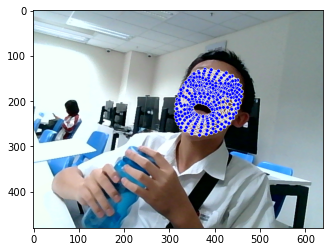

In [23]:
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=30, min_detection_confidence=0.5)
results = face_mesh.process(frame)
mark = frame
if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(mark, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION)
        print("Processed an image")
plt.imshow(mark)

In [3]:
# Try to use the model Indian man bestowed on us

from ultralytics import YOLO

import numpy as np


model = YOLO('/last.pt')  # load a custom model

results = model('frame')  # predict on an image

names_dict = results[0].names

probs = results[0].probs.data.tolist()

print(names_dict)
print(probs)

print(names_dict[np.argmax(probs)])

ConnectionError: HTTPSConnectionPool(host='api.github.com', port=443): Max retries exceeded with url: /repos/ultralytics/assets/releases/tags/v8.3.0 (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0xffff3ddb7ca0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))